In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from json import loads 

In [108]:
velib = pd.read_csv("donnée/velib_clean.csv")

In [109]:
velib.head()

,station_id,10/19/20;18:01:51,10/19/20;18:06:52,10/19/20;18:11:52,10/19/20;18:16:52,10/19/20;18:21:52,10/19/20;18:26:53,10/19/20;18:31:53,10/19/20;18:36:53,10/19/20;18:41:54,...,11/03/20;16:01:46,11/03/20;16:06:47,11/03/20;16:11:47,11/03/20;16:16:47,11/03/20;16:21:48,11/03/20;16:26:48,11/03/20;16:31:48,11/03/20;16:36:49,11/03/20;16:41:49,11/03/20;16:46:49
0,213688169,"{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}",...,"{'mechanical': 4, 'ebike': 6}","{'mechanical': 4, 'ebike': 6}","{'mechanical': 3, 'ebike': 6}","{'mechanical': 4, 'ebike': 7}","{'mechanical': 5, 'ebike': 7}","{'mechanical': 5, 'ebike': 7}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 7}"
1,99950133,"{'mechanical': 41, 'ebike': 5}","{'mechanical': 41, 'ebike': 5}","{'mechanical': 42, 'ebike': 5}","{'mechanical': 42, 'ebike': 7}","{'mechanical': 41, 'ebike': 5}","{'mechanical': 40, 'ebike': 4}","{'mechanical': 38, 'ebike': 5}","{'mechanical': 39, 'ebike': 4}","{'mechanical': 40, 'ebike': 5}",...,"{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}"
2,516709288,"{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}",...,"{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 3}"
3,36255,"{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 1, 'ebike': 3}",...,"{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 2}"
4,37815204,"{'mechanical': 4, 'ebike': 1}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 3, 'ebike': 2}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}",...,"{'mechanical': 6, 'ebike': 0}","{'mechanical': 7, 'ebike': 0}","{'mechanical': 7, 'ebike': 0}","{'mechanical': 7, 'ebike': 1}","{'mechanical': 7, 'ebike': 1}","{'mechanical': 8, 'ebike': 1}","{'mechanical': 9, 'ebike': 0}","{'mechanical': 10, 'ebike': 0}","{'mechanical': 9, 'ebike': 0}","{'mechanical': 9, 'ebike': 0}"


In [110]:
def to_dictionary(jour):
    """transformer le format chelou en dico"""

    try :
        dictionary = eval(jour)
    except:
        dictionary = {'mechanical': 0, 'ebike': 0}
    
    return dictionary

In [111]:
col_vide='[{}, {}]'
colonnes_vides=[]
for j in velib.columns:
    if velib[j][0]==col_vide:
        print(j)
        colonnes_vides.append(j)

velib=velib.drop(colonnes_vides,axis=1)

In [112]:
longueur_du_dataframe = len(velib.iloc[1])

for i,j in enumerate(velib.columns[1:]):

    if i % 200 == 0:
        print(int(100 * i / longueur_du_dataframe))

    velib[j] = [to_dictionary(i) for i in velib[j]]

0
4
9
13
18
23
27
32
37
41
46
51
55
60
65
69
74
79
83
88
93
97


In [113]:
X[1]

Timestamp('2020-10-19 18:06:52')

In [114]:
X = [ pd.to_datetime(date, format = r"%m/%d/%y;%H:%M:%S") for date in velib.columns[1:]]
Y_m = [dictionary["mechanical"] for dictionary in velib.iloc[1][1:]]
Y_e = [dictionary["ebike"] for dictionary in velib.iloc[1][1:]]

In [115]:
import matplotlib.pyplot as plt

In [116]:
print(len(X),len(Y_m))
X_i = x = np.linspace(0, 10, len(Y_m))

4294 4294


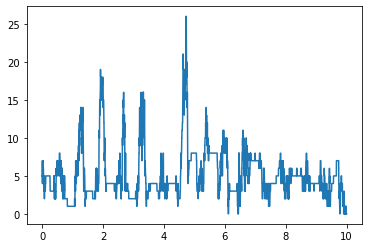

In [117]:
plt.plot(X_i,Y_e)
plt.show()

In [118]:
print(X[1],X[-1])

2020-10-19 18:06:52 2020-11-03 16:46:49


In [119]:
def mean_by_days(X, Y):
    x = []
    y = []


    if not len(X) == len(Y):
        return False


    old_day = [X[0].day, X[0].month, X[0].year]
    mean = 0
    iteration = 0

    for i in range(len(X)):
        day = [X[i].day, X[i].month, X[i].year]

        if  day == old_day:
            mean += Y[i]
            iteration += 1

        else :

            try:
                y.append(mean / iteration)
            except:
                y.append(0)

            x.append(str(old_day[0]) + "/" + str(old_day[1]))
            
            old_day = day
            mean = 0
            iteration = 0

    return x, y


In [120]:
x, y_e = mean_by_days(X, Y_e)
x, y_m = mean_by_days(X, Y_m)

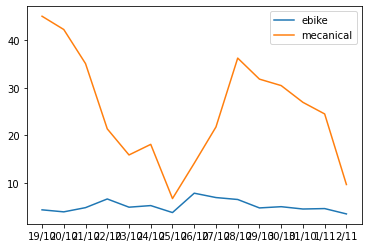

In [121]:
plt.plot(x, y_e, label = "ebike")
plt.plot(x, y_m, label = "mecanical")
plt.legend()
plt.show()

In [122]:
def average_day_by_hours (X, Y):
    x = []
    y = []
    
    if not len(X) == len(Y):
        return False

    hours = {}

    for i in range(24):
        hours[i] = []

    for i in range(len(X)):
        hours[X[i].hour].append(Y[i])

    for i in range(24):
        y.append(
            sum(hours[i]) / len(hours[i])
        )
        x.append(i)

    return x, y

In [123]:
hours, mean_hour_e = average_day_by_hours(X, Y_e)
hours, mean_hour_m = average_day_by_hours(X, Y_m)

[]

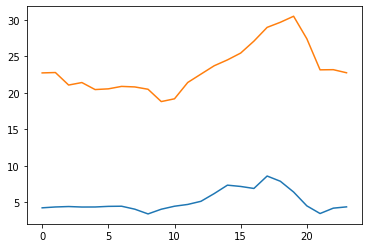

In [124]:
plt.plot(hours, mean_hour_e)
plt.plot(hours, mean_hour_m)
plt.plot()

NameError: name 'μ' is not defined